<a href="https://colab.research.google.com/github/SrMouraSilva/Modelagem-matematica-trabalho-final/blob/main/6_13.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Programação simbólica
from sympy import *
from sympy.plotting import plot, plot3d
 
# Exibir símbolos nos plots
from google.colab.output._publish import javascript
url = "https://cdnjs.cloudflare.com/ajax/libs/mathjax/3.1.2/latest.js?config=default"
 
javascript(url=url)
from IPython.display import Math
 
# Manipulação dos dados
import numpy as np
import pandas as pd
 
# Gráficos
import matplotlib as mpl
import matplotlib.pyplot as plt
 
import seaborn as sns
sns.set_theme()

In [ ]:
mpl.rcParams['figure.figsize'] = (12,8)
mpl.rcParams['font.size'] = 14
mpl.rcParams['legend.fontsize'] = 14

## Questão 6.13

(Continuation of Exercise 12) Clear-cutting is a technique in which all ofthe trees in the forest are harvested at one time and then replanted.

### a) Determine the optimal harvest policy for this forest; i.e., determine the number of years we should wait before cutting and replanting. Assume that replanting involves $100$ tons/acre of hardwoods and $100$ tons/acre of softwoods. Base your answer on the number of $/acre per year generated.

Relembrando o item 6.12.c

> c) Assuming that hardwoods are worth four times as much as softwoods in \\$/ton, determine the point at which the value of the forest stand (\\$/acre) is increasing at the fastest rate.

> Encontrar o ponto em que o valor da floresta (\\$/acre) está aumentando na taxa mais rápida corresponde a encontrar o $t$ no seguinte procedimento
$$
\text{arg max}_{t \in \mathcal{T}} \frac{(4x_{1,t+1} + x_{2,t+1}) - (4x_{1,t} + x_{2,t})}{t + 1 - t}
$$
sendo $\mathcal{T}$ o conjunto de números inteiros que representam os anos da simulação e $\frac{(4x_{1,t+1} + x_{2,t+1}) - (4x_{1,t} + x_{2,t})}{t + 1 - t}$ a taxa de variação anual do valor da floresta entre o ano $t$ para $t+1$.

Nesta questão, estamos interessados em achar o momento ideal para fazer a colheita.

Consideremos as equações diferenciais definidas em 6.12.a

In [ ]:
def equacoes(x1, x2):
    return (
        0.10*x1 - (0.10/10_000)*x1**2 - (0.05/10_000)*x1*x2,
        0.25*x2 - (0.25/6_000)*x2**2 - (0.125/6_000)*x1*x2
    )

x1, x2 = var('x1 x2', real=True)

dFdx1, dFdx2 = equacoes(x1, x2)

Math(f"""
\\begin{{aligned}}
\\frac{{dx_1}}{{dt}} &= {latex(dFdx1)} \\\\
\\frac{{dx_2}}{{dt}} &= {latex(dFdx2)} \\\\
\\end{{aligned}}
""")

<IPython.core.display.Math object>

a população inicial para ambas as espécies definido pelo enunciado

In [ ]:
populacao_inicial_x1 = 100
populacao_inicial_x2 = 100

e o mesmo algoritmo de simulação.

In [ ]:
def Simulacao(variaveis, valores_iniciais, funcoes, numero_iteracoes, eta=1e-4):
    num_variaveis = len(variaveis)
    x_ = np.zeros((num_variaveis, numero_iteracoes+1))
    x_[:, 0] = valores_iniciais

    estabilizou = np.zeros(num_variaveis, dtype=bool)

    for k in range(numero_iteracoes):
        x_k = x_[:, [k]]

        valores = {k: v for k, v in zip(variaveis, x_k.flatten())}
        for i, (variavel, funcao) in enumerate(zip(variaveis, funcoes)):
            x_i = valores[variavel]
            x_i_next = x_i + N(funcao.subs(valores))
            x_[i, k+1] = x_i_next

            estabilizou[i] = abs(x_i - x_i_next) < eta

        if all(estabilizou):
            break

    return pd.DataFrame(x_.T[:k+2], columns=[str(v) for v in variaveis])

Executando o algoritmo nas condições acima mencionadas, temos

In [ ]:
simulacao_a = Simulacao(
    variaveis=(x1, x2),
    valores_iniciais=(populacao_inicial_x1, populacao_inicial_x2),
    funcoes=(dFdx1, dFdx2),
    numero_iteracoes=1000
)

* a população das árvores ao longo do tempo:

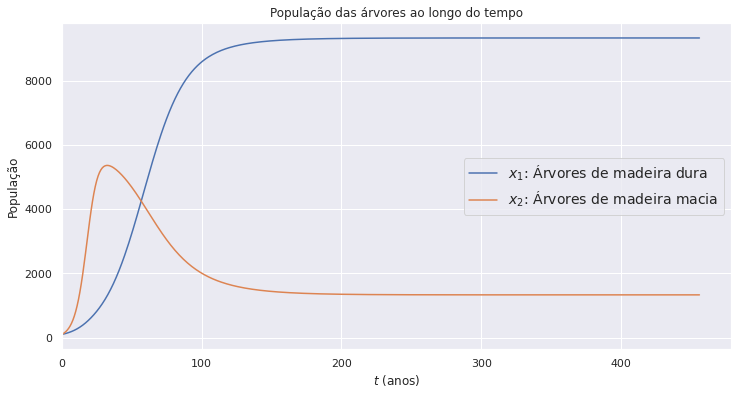

In [ ]:
ax = simulacao_a.plot(xlabel='$t$ (anos)', ylabel='População', title=f'População das árvores ao longo do tempo', figsize=(12, 6))
ax.set_xlim(left=0);
plt.legend(['$x_1$: Árvores de madeira dura', '$x_2$: Árvores de madeira macia'])

* o valor da floresta para cada ano:
 
Lembre-se que a questão 6.12.c somente informa que árvores de madeira dura são quatro vezes mais valiosas que as de madeira macia e que não foi definido um valor de uma ton/acre.

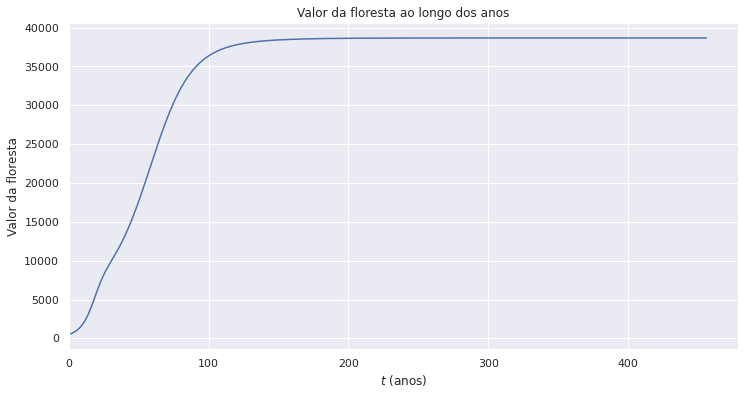

In [ ]:
valor_floresta_a = (4*simulacao_a.x1 + simulacao_a.x2)
ax = valor_floresta_a.plot(xlabel='$t$ (anos)', ylabel='Valor da floresta', title=f'Valor da floresta ao longo dos anos', figsize=(12, 6))
ax.set_xlim(left=0);

* a taxa de variação anual do valor da floresta e o momento $t$ com a maior taxa de variação:
$$
\text{arg max}_{t \in \mathcal{T}} \frac{(4x_{1,t+1} + x_{2,t+1}) - (4x_{1,t} + x_{2,t})}{t + 1 - t}
$$

Note que a taxa calculada aqui é anual, de forma que o gráfico indica o aumento do valor da floresta do tempo $t$ para $t+1$.

<IPython.core.display.Math object>

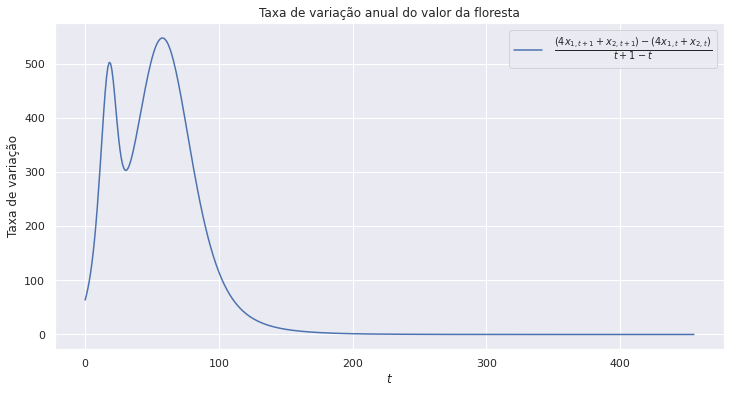

In [ ]:
taxa_variacao_a = valor_floresta_a[1:].to_numpy() - valor_floresta_a[:-1].to_numpy()
taxa_variacao_a = pd.DataFrame(taxa_variacao_a, columns=['$\\frac{(4x_{1,t+1} + x_{2,t+1}) - (4x_{1,t} + x_{2,t})}{t + 1 - t}$'])

taxa_variacao_a.plot(
    title='Taxa de variação anual do valor da floresta',
    xlabel='$t$',
    ylabel='Taxa de variação',
    figsize=(12, 6)
)

taxa_variacao_a_pico = taxa_variacao_a[taxa_variacao_a.columns[0]].argmax()

Math(f"\\text{{Tempo $t$ em que há a maior taxa de crescimento do valor da floresta de $t$ para $t+1$: }} \\\\ t={taxa_variacao_a_pico}")

* o lucro anual que se teria se vendesse no $t$-ésimo ano
$$
\text{lucro}_t = \frac{4x_{1,t+1} + x_{2,t+1}}{t}
$$

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


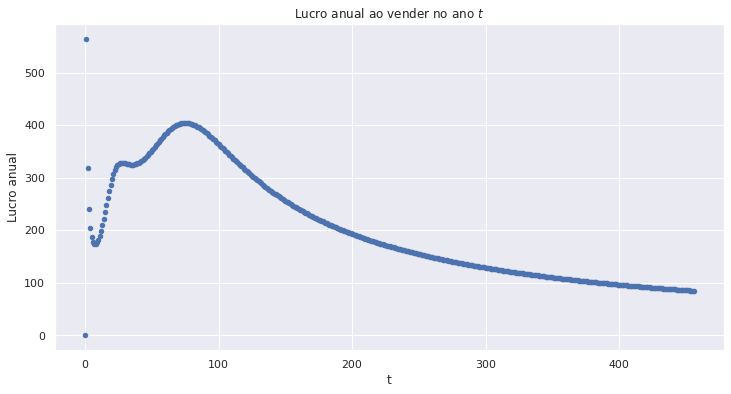

In [ ]:
lucro_ano = (valor_floresta_a/valor_floresta_a.index).replace(np.inf, 0).to_frame()
lucro_ano.columns = ['Lucro anual']
lucro_ano['t'] = lucro_ano.index

lucro_ano.plot.scatter(
    x='t',
    y='Lucro anual',
    title='Lucro anual ao vender no ano $t$',
    xlabel='$t$',
    ylabel='Taxa de variação',
    figsize=(12, 6)
)

Houve um ajuste no gráfico acima: dado que a venda proporcionaria um lucro infinito, consideramos como **zero** no $t = 0$.

Estamos interessados em achar o ano em que seria possível obter o maior lucro anual na venda, isto é
$$
\text{arg max}_{t \in \mathcal{T}} \frac{4x_{1,t+1} + x_{2,t+1}}{t}
$$

Pelo gráfico acima, vemos que é o ano 1. Porém, sabendo que a "colheita" anual é inviável, dado a problemas de erosão e empobrecimento no solo, procuraremos o segundo maior

\begin{aligned}
\text{arg max}_{t \in \mathcal{T}} &~~ \frac{4x_{1,t+1} + x_{2,t+1}}{t} \\
\text{para } &~~ t > 1.
\end{aligned}


Em relação a "colheita" de madeira, o ideal é que a colheita ocorra após o período de maior crescimento do lucro. Logo, deve-se cortar em intervalos de 75 anos.

In [ ]:
lucro_ano_a_pico = lucro_ano['Lucro anual'][2:].idxmax()

Math(f"""\\text{{Tempo $t>1$ em que traria o maior lucro anual: }} \\\\ 
t = {lucro_ano_a_pico} \\text{{º ano}} \\\\
\\text{{Lucro de }} {lucro_ano.loc[lucro_ano_a_pico]['Lucro anual']} \\text{{ \$/acre por ano.}}""")

<IPython.core.display.Math object>

### b) Determine the optimal harvest policy, assuming that only hardwoods are replanted ($200$ tons/acre).

Executando a simulação nas condições mencionadas no enunciado, temos

In [ ]:
simulacao_b = Simulacao(
    variaveis=(x1, x2),
    valores_iniciais=(200, 0),
    funcoes=(dFdx1, dFdx2),
    numero_iteracoes=1000
)

* a população das árvores ao longo do tempo:

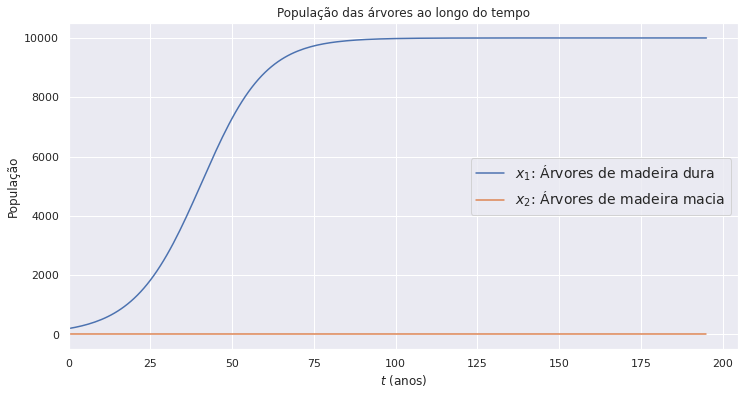

In [ ]:
ax = simulacao_b.plot(xlabel='$t$ (anos)', ylabel='População', title=f'População das árvores ao longo do tempo', figsize=(12, 6))
ax.set_xlim(left=0);
plt.legend(['$x_1$: Árvores de madeira dura', '$x_2$: Árvores de madeira macia'])

* o valor da floresta para cada ano:

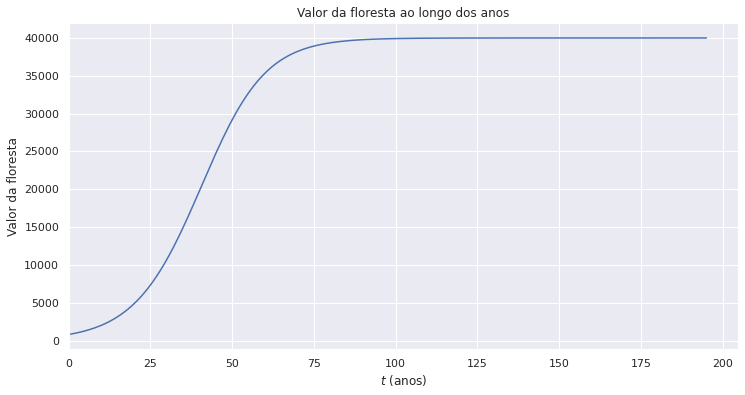

In [ ]:
valor_floresta_b = (4*simulacao_b.x1 + simulacao_b.x2)
ax = valor_floresta_b.plot(xlabel='$t$ (anos)', ylabel='Valor da floresta', title=f'Valor da floresta ao longo dos anos', figsize=(12, 6))
ax.set_xlim(left=0);

* o lucro anual que se teria se vendesse no $t$-ésimo ano
$$
\text{lucro}_t = \frac{4x_{1,t+1} + x_{2,t+1}}{t}
$$

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


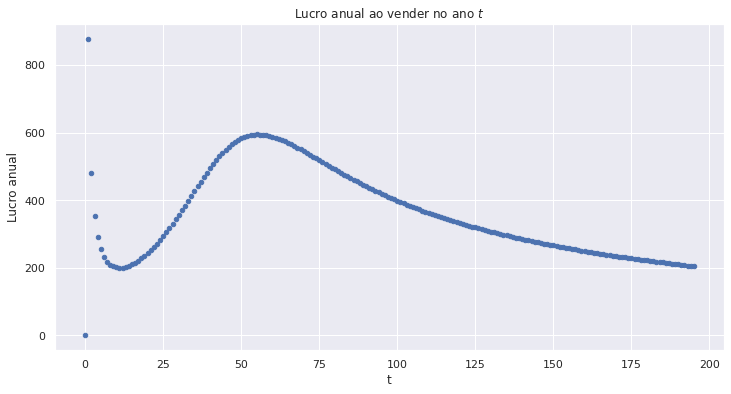

In [ ]:
lucro_ano = (valor_floresta_b/valor_floresta_b.index).replace(np.inf, 0).to_frame()
lucro_ano.columns = ['Lucro anual']
lucro_ano['t'] = lucro_ano.index

lucro_ano.plot.scatter(
    x='t',
    y='Lucro anual',
    title='Lucro anual ao vender no ano $t$',
    xlabel='$t$',
    ylabel='Taxa de variação',
    figsize=(12, 6)
)

Houve um ajuste no gráfico acima: dado que a venda proporcionaria um lucro infinito, consideramos como **zero** no $t = 0$.

Estamos interessados em achar o ano em que seria possível obter o maior lucro anual na venda, isto é
$$
\text{arg max}_{t \in \mathcal{T}} \frac{4x_{1,t+1} + x_{2,t+1}}{t}
$$

Pelo gráfico acima, vemos que é o ano 1. Porém, sabendo que a "colheita" anual é inviável, dado a problemas de erosão no solo, procuraremos o segundo maior

\begin{aligned}
\text{arg max}_{t \in \mathcal{T}} &~~ \frac{4x_{1,t+1} + x_{2,t+1}}{t} \\
\text{para } &~~ t > 1.
\end{aligned}

Em relação a "colheita" de madeira, o ideal é que a colheita ocorra após o período de maior crescimento do lucro. Logo, ao desconsiderar os anos $t=0$ e $t=1$, deve-se cortar em intervalos de 55 anos.

In [ ]:
lucro_ano_b_pico = lucro_ano['Lucro anual'][2:].idxmax()

Math(f"""\\text{{Tempo $t>1$ em que traria o maior lucro anual: }} \\\\ 
t = {lucro_ano_b_pico} \\text{{º ano}} \\\\
\\text{{Lucro de }} {lucro_ano.loc[lucro_ano_b_pico]['Lucro anual']} \\text{{ \$/acre por ano.}}""")

<IPython.core.display.Math object>

Observe que tanto o lucro anual é maior que o do item $a)$, quanto o retorno é mais cedo.

### c) Repeat part (b), but now assume that only softwoods are replanted ($200$ tons/acre)

Executando a simulação nas condições mencionadas no enunciado, temos

In [ ]:
simulacao_c = Simulacao(
    variaveis=(x1, x2),
    valores_iniciais=(0, 200),
    funcoes=(dFdx1, dFdx2),
    numero_iteracoes=1000
)

* a população das árvores ao longo do tempo:

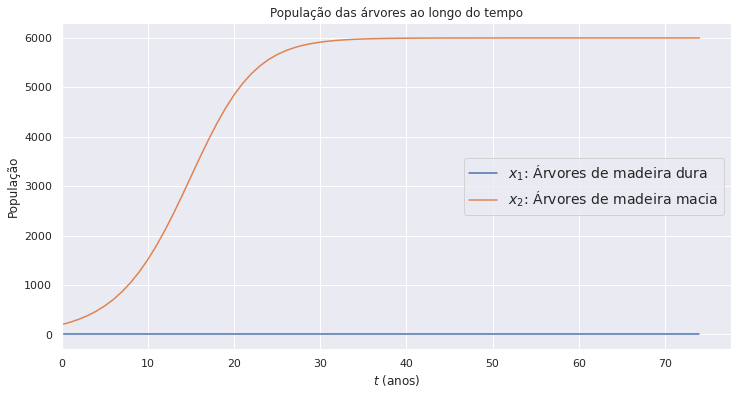

In [ ]:
ax = simulacao_c.plot(xlabel='$t$ (anos)', ylabel='População', title=f'População das árvores ao longo do tempo', figsize=(12, 6))
ax.set_xlim(left=0);
plt.legend(['$x_1$: Árvores de madeira dura', '$x_2$: Árvores de madeira macia'])

* o valor da floresta para cada ano:

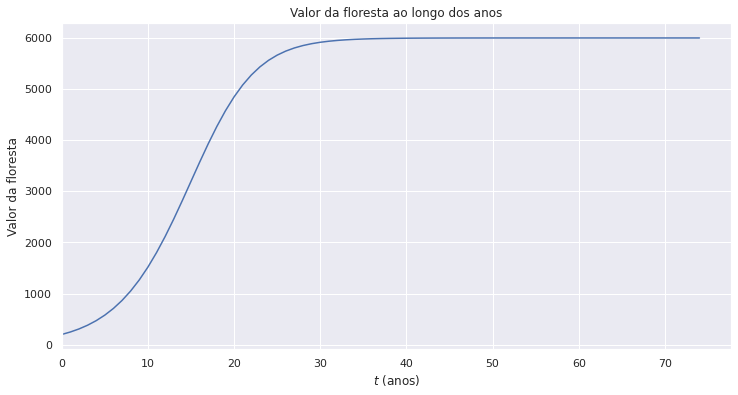

In [ ]:
valor_floresta_c = (4*simulacao_c.x1 + simulacao_c.x2)
ax = valor_floresta_c.plot(xlabel='$t$ (anos)', ylabel='Valor da floresta', title=f'Valor da floresta ao longo dos anos', figsize=(12, 6))
ax.set_xlim(left=0);

* o lucro anual que se teria se vendesse no $t$-ésimo ano
$$
\text{lucro}_t = \frac{4x_{1,t+1} + x_{2,t+1}}{t}
$$

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


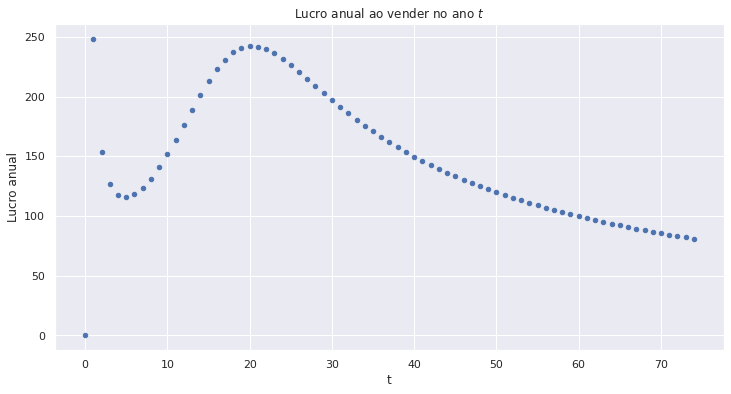

In [ ]:
lucro_ano = (valor_floresta_c/valor_floresta_c.index).replace(np.inf, 0).to_frame()
lucro_ano.columns = ['Lucro anual']
lucro_ano['t'] = lucro_ano.index

lucro_ano.plot.scatter(
    x='t',
    y='Lucro anual',
    title='Lucro anual ao vender no ano $t$',
    xlabel='$t$',
    ylabel='Taxa de variação',
    figsize=(12, 6)
)

Houve um ajuste no gráfico acima: dado que a venda proporcionaria um lucro infinito, consideramos como **zero** no $t = 0$.

Estamos interessados em achar o ano em que seria possível obter o maior lucro anual na venda, isto é
$$
\text{arg max}_{t \in \mathcal{T}} \frac{4x_{1,t+1} + x_{2,t+1}}{t}
$$

Pelo gráfico acima, vemos que é o ano 1. Porém, sabendo que a "colheita" anual é inviável, dado a problemas de erosão no solo, procuraremos o segundo maior

\begin{aligned}
\text{arg max}_{t \in \mathcal{T}} &~~ \frac{4x_{1,t+1} + x_{2,t+1}}{t} \\
\text{para } &~~ t > 1.
\end{aligned}


No gráfico acima, podemos ver que até o ano 20, a taxa de variação do valor da floresta é crescente. Ou seja, esse é o período que a população da floresta, e, consequentemente, o valor da floresta mais cresce no menor intervalo de tempo. 

Em relação a "colheita" de madeira, o ideal é que a colheita ocorra após o período de maior crescimento do lucro. Logo, deve-se cortar em intervalos de 20 anos.

In [ ]:
lucro_ano_c_pico = lucro_ano['Lucro anual'][2:].idxmax()

Math(f"""\\text{{Tempo $t>1$ em que traria o maior lucro anual: }} \\\\ 
t = {lucro_ano_c_pico} \\text{{º ano}} \\\\
\\text{{Lucro de }} {lucro_ano.loc[lucro_ano_c_pico]['Lucro anual']} \\text{{ \$/acre por ano.}}""")

<IPython.core.display.Math object>

Observe que o lucro anual deste item é o menor de todos se for comparado com os itens $a)$ e $b)$ mesmo o retorno sendo mais cedo.

### d) State the optimal clear–cutting policy for management of this tract of forest land. At what point would you consider selling the land rather than reforesting?

Fazendo uma comparação entre as respostas dos itens $a$, $b$ e $c$, podemos observar que a melhor opção que a empresa poderia fazer com a terra sob o esquema de **clear-cutting** seria derrubar a cada 55 anos e replantar apenas árvores de madeira dura, tendo um lucro anual de 595 dólares aproximadamente por acre.


Testemos agora diversos valores para as populações replantadas. Consideremos que a população replantada corresponderá a no máximo $10\%$ da população máxima viável de árvores de madeira dura e de árvores de madeira macia. Além disso, consideramos que deve-se esperar no mínimo 20 anos para a colheita, de forma a evitar problemas de desgaste do solo.

As populações replantadas testadas correspondem a:

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


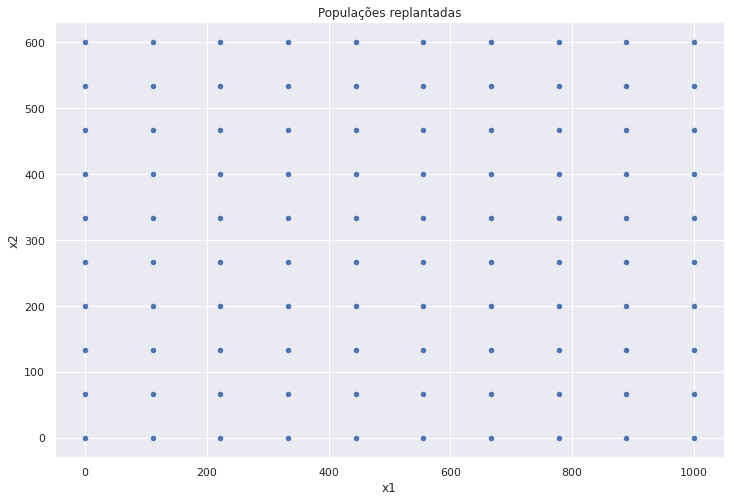

In [ ]:
from itertools import product

populacoes_iniciais = list(product(
    np.linspace(0, 10_000 * 0.1, 10),
    np.linspace(0, 6_000 * 0.1, 10)
))

pd.DataFrame(populacoes_iniciais, columns=('x1', 'x2')).plot.scatter(x='x1', y='x2', title='Populações replantadas', xlabel='$x_1$', ylabel='$x_2$')

Executemos as simulações:

In [ ]:
from tqdm import tqdm

simulacoes_d = []
for x1_0, x2_0 in tqdm(populacoes_iniciais):
    simulacoes_d.append(
        Simulacao(
            variaveis=(x1, x2),
            valores_iniciais=(x1_0, x2_0),
            funcoes=(dFdx1, dFdx2),
            numero_iteracoes=100
        )
    )

100%|██████████| 100/100 [00:34<00:00,  2.86it/s]


Agora listemos os dez casos em que há o maior lucro anual na colheita a partir do vigésimo ano. A coluna `t` informa o ano da colheita, `x1_0` a população replantada de árvores de madeira dura, `x2_0` a população replantada de árvores de madeira macia.

In [ ]:
lucros = []
for simulacao, (x1_0, x2_0) in zip(simulacoes_d, list(populacoes_iniciais)):
    valor_floresta = (4*simulacao.x1 + simulacao.x2)

    lucro_ano = (valor_floresta/valor_floresta.index).replace(np.inf, 0).to_frame()
    lucro_ano.columns = ['Lucro anual']
    lucro_ano['t'] = lucro_ano.index
    lucro_ano['x1_0'] = x1_0
    lucro_ano['x2_0'] = x2_0
    lucros.append(lucro_ano)


lucros = pd.concat(lucros).reset_index()
del lucros['index']
lucros[lucros.t >= 20].sort_values('Lucro anual', ascending=False)[:10]

,Lucro anual,t,x1_0,x2_0
9068,944.889836,20,1000.0,200.000000
9169,944.779756,20,1000.0,266.666667
9270,942.645279,20,1000.0,333.333333
8967,940.418575,20,1000.0,133.333333
9371,939.598289,20,1000.0,400.000000
9069,939.311501,21,1000.0,200.000000
8968,938.486307,21,1000.0,133.333333
9170,936.597655,21,1000.0,266.666667
9472,936.164127,20,1000.0,466.666667
8969,935.410927,22,1000.0,133.333333


O melhor caso corresponde ao ano $t=20$, com lucro anual estimado de $944.89$ \$/acre por ano.

Por fim, vejamos qual o lucro máximo obtido pelas simulações caso o ano para a colheita fosse pré-determinado. Podemos ver que entre os anos 20 e 35, o melhor lucro anual possível é próximo, de modo que seria interessante considerar um tempo para colheita maior, de forma a trazer menos prejuízo para a terra.

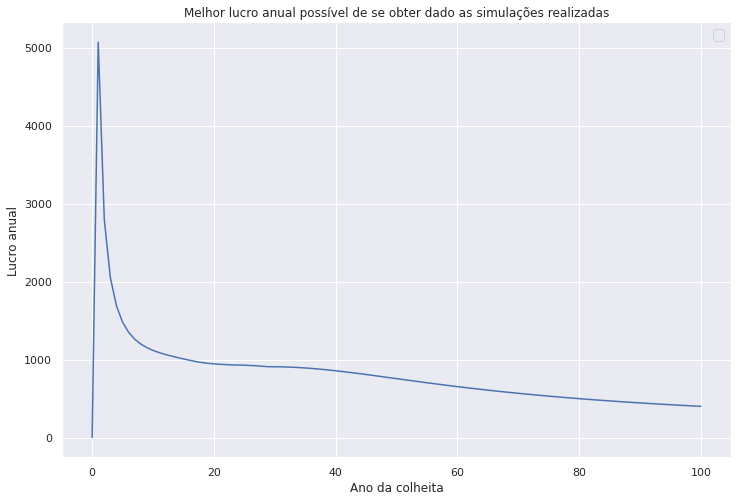

In [ ]:
lucros[['Lucro anual', 't']].groupby('t').max().plot(xlabel='Ano da colheita', ylabel='Lucro anual', title='Melhor lucro anual possível de se obter dado as simulações realizadas')
plt.legend([])

#### At what point would you consider selling the land rather than reforesting?

Caso a empresa pudesse vender a terra por $Q$ dólares por acre e pudesse colocar o dinheiro em outro serviço que resultasse em um retorno de $R\%$ ao ano, então a empresa deveria vender o terreno caso $\frac{R \cdot Q}{100} > $ valor do lucro estimado com _clear-cutting_. 